In [5]:
from keras.layers import Input, Dense 
from keras.models import Model 
from keras.datasets import mnist 
import numpy as np 
import matplotlib.pyplot as plt


In [64]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape
 

(60000, 28, 28)

In [66]:
# 数据预处理
x_train = x_train.astype('float32') / 255. - 0.5       # minmax_normalized
x_test = x_test.astype('float32') / 255. - 0.5         # minmax_normalized
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


> ## 二维可视化

In [68]:
# 压缩特征维度至2维
encoding_dim = 2
 
# this is our input placeholder
input_img = Input(shape=(784,))
 
# 编码层
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)
 
# 解码层
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)

In [69]:
# 构建自编码模型
autoencoder = Model(inputs=input_img, outputs=decoded)
 
# 构建编码模型
encoder = Model(inputs=input_img, outputs=encoder_output)
 


In [70]:
# compile autoencoder
from keras.callbacks.callbacks import ReduceLROnPlateau, EarlyStopping
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [71]:
# training
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto', baseline=None, restore_best_weights=False)
reduce_lr  = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
history = autoencoder.fit(x_train, x_train, validation_data=(x_test, x_test),epochs=50, batch_size=256, shuffle=True, callbacks=[reduce_lr, early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.0709 - mae: 0.1704 - val_loss: 0.0610 - val_mae: 0.1516
Epoch 2/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0567 - mae: 0.1413 - val_loss: 0.0520 - val_mae: 0.1267
Epoch 3/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.0503 - mae: 0.1222 - val_loss: 0.0489 - val_mae: 0.1200
Epoch 4/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0479 - mae: 0.1174 - val_loss: 0.0469 - val_mae: 0.1159
Epoch 5/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0463 - mae: 0.1143 - val_loss: 0.0457 - val_mae: 0.1131
Epoch 6/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0451 - mae: 0.1119 - val_loss: 0.0447 - val_mae: 0.1108
Epoch 7/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.0443 - mae: 0.1102 - val_loss: 0.0437 - val_mae

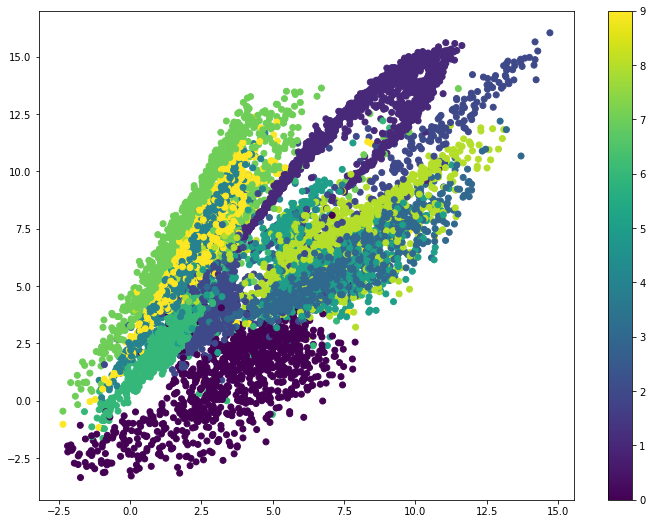

In [73]:
# predict & plotting
encoded_imgs = encoder.predict(x_test)
plt.figure(figsize= (12,9)) # 设置窗口大小
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test) # 绘制散点图
plt.colorbar() 
plt.show()

## 三维可视化

In [75]:
# 压缩特征维度至3维
encoding_dim = 3
 
# this is our input placeholder
input_img = Input(shape=(784,))
 
# 编码层
encoded3D = Dense(128, activation='relu')(input_img)
encoded3D = Dense(64, activation='relu')(encoded3D)
encoded3D = Dense(10, activation='relu')(encoded3D)
encoder_output_3D = Dense(encoding_dim)(encoded3D)
 
# 解码层
decoded3D = Dense(10, activation='relu')(encoder_output_3D)
decoded3D = Dense(64, activation='relu')(decoded3D)
decoded3D = Dense(128, activation='relu')(decoded3D)
decoded3D = Dense(784, activation='tanh')(decoded3D)

# 构建自编码模型
autoencoder3D = Model(inputs=input_img, outputs=decoded3D)
 
# 构建编码模型
encoder3D = Model(inputs=input_img, outputs=encoder_output_3D)
 

In [77]:
# compile autoencoder
from keras.callbacks.callbacks import ReduceLROnPlateau, EarlyStopping
autoencoder3D.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [78]:
# training
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto', baseline=None, restore_best_weights=False)
reduce_lr  = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
history = autoencoder3D.fit(x_train, x_train, validation_data=(x_test, x_test),epochs=50, batch_size=256, shuffle=True, callbacks=[reduce_lr, early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.0695 - mae: 0.1675 - val_loss: 0.0592 - val_mae: 0.1463
Epoch 2/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.0554 - mae: 0.1388 - val_loss: 0.0517 - val_mae: 0.1322
Epoch 3/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.0497 - mae: 0.1290 - val_loss: 0.0474 - val_mae: 0.1257
Epoch 4/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.0455 - mae: 0.1183 - val_loss: 0.0441 - val_mae: 0.1158
Epoch 5/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0434 - mae: 0.1125 - val_loss: 0.0425 - val_mae: 0.1109
Epoch 6/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0421 - mae: 0.1098 - val_loss: 0.0414 - val_mae: 0.1083
Epoch 7/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.0410 - mae: 0.1078 - val_loss: 0.0405 - val_mae

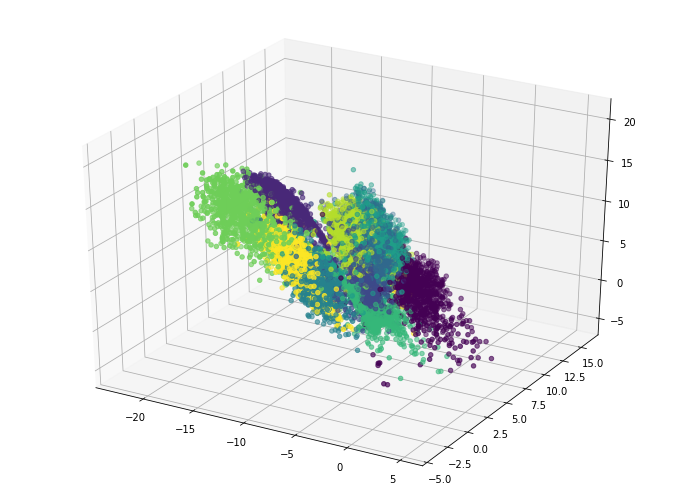

In [80]:
# predict & plotting
encoded_imgs = encoder3D.predict(x_test)
plt.figure(figsize= (12,9))
ax1 = plt.axes(projection='3d')
ax1.scatter3D(encoded_imgs[:, 0], encoded_imgs[:, 1],encoded_imgs[:, 2], c=y_test)
plt.show()